In [11]:
import pandas as pd
from adni_settings import root_dir,train_dir,test_dir,CSV_DIR, image_dir
from adni_dataset import Supervised_Multimodal_Dataset, AdniDataModule
import glob
import os

In [34]:
import numpy as np 
def estimate_weights_mfb(label):

    metadata = pd.read_csv(CSV_DIR)

    class_weights = np.zeros_like(label, dtype=float)
    counts = np.zeros_like(label)
    print(class_weights)
    print(counts)
    for i, l in enumerate(label):
        counts[i] = metadata[metadata['label'] == str(l)]['label'].value_counts()[0]
    counts = counts.astype(float)
    median_freq = np.median(counts)
    for i, label in enumerate(label):
        class_weights[i] = median_freq / counts[i]
    return class_weights


In [35]:
# # A path to the folder which has all the images:
# data_dir = os.getcwd() + r"\data\skin_lesion"
# # A path to the folder where you want to store the rearranged images:
# dest_dir = os.getcwd() + r"\data\skin_lesion\HAM10K_grouped_images"
# lables in data
label = ['CN','AD', 'LMCI']

# calculate class weights
classweight = estimate_weights_mfb(label)
for i in range(len(label)):
    print(label[i], ":", classweight[i])

[0. 0. 0.]
['' '' '']
CN : 1.0
AD : 1.9413680781758957
LMCI : 0.6704161979752531


# conduct analysis on adni

In [22]:
df = pd.read_csv(CSV_DIR)

In [3]:
df

,r_id,adni_study,p_id,age,gender,education,APOE4,FDG,TAU,PTAU,...,date,VISCODE,image_id_month,image_id,image_original,FDG_missing,TAU_missing,PTAU_missing,gender_numeric,label_numeric
0,5,ADNI1,011_S_0005,73.7,Male,16,0.0,1.362880,337.0,33.430,...,2007-09-07,m24,011_S_0005-2007-09,011_S_0005-2007-09-07,011_S_0005-2007-09-07_12_22_08.0.nii.gz,0,1,1,0,0
1,5,ADNI1,011_S_0005,73.7,Male,16,0.0,1.338660,337.0,33.430,...,2008-09-10,m36,011_S_0005-2008-09,011_S_0005-2008-09-10,011_S_0005-2008-09-10_12_08_32.0.nii.gz,0,1,1,0,0
2,10,ADNI1,011_S_0010,73.9,Female,12,1.0,1.075580,308.8,29.315,...,2006-05-09,m06,011_S_0010-2006-05,011_S_0010-2006-05-09,011_S_0010-2006-05-09_12_35_01.0.nii.gz,0,1,1,1,1
3,10,ADNI1,011_S_0010,73.9,Female,12,1.0,1.007210,287.7,27.370,...,2006-11-09,m12,011_S_0010-2006-11,011_S_0010-2006-11-09,011_S_0010-2006-11-09_12_01_54.0.nii.gz,0,0,0,1,1
4,10,ADNI1,011_S_0010,73.9,Female,12,1.0,0.959766,308.8,29.315,...,2007-11-07,m24,011_S_0010-2007-11,011_S_0010-2007-11-07,011_S_0010-2007-11-07_12_23_57.0.nii.gz,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,1206,ADNI1,007_S_1206,72.9,Male,14,0.0,1.173217,285.1,23.690,...,2009-02-05,m24,007_S_1206-2009-02,007_S_1206-2009-02-05,007_S_1206-2009-02-12_11_33_49.0.nii.gz,1,0,0,0,0
1788,1206,ADNI1,007_S_1206,72.9,Male,14,0.0,1.173217,265.9,22.230,...,2010-02-04,m36,007_S_1206-2010-02,007_S_1206-2010-02-04,007_S_1206-2010-02-10_12_20_13.0.nii.gz,1,1,1,0,0
1789,1227,ADNI1,136_S_1227,64.6,Female,12,0.0,1.173217,221.9,18.660,...,2007-02-19,bl,136_S_1227-2007-02,136_S_1227-2007-02-19,136_S_1227-2007-02-06_15_41_39.0.nii.gz,1,0,0,1,2
1790,691,ADNI1,131_S_0691,64.3,Male,16,1.0,1.173217,80.0,8.000,...,2006-07-25,bl,131_S_0691-2006-07,131_S_0691-2006-07-25,131_S_0691-2006-07-26_11_16_19.0.nii.gz,1,0,0,0,1


In [6]:
df.groupby('p_id').count()['r_id'].max(),df.groupby('p_id').count()['r_id'].min(),df.groupby('p_id').count()['r_id'].mean()

(6, 1, 2.6430678466076696)

In [7]:
list(
    df.columns)

['r_id',
 'adni_study',
 'p_id',
 'age',
 'gender',
 'education',
 'APOE4',
 'FDG',
 'TAU',
 'PTAU',
 'MMSE',
 'label',
 'update_stamp',
 'date',
 'VISCODE',
 'image_id_month',
 'image_id',
 'image_original',
 'FDG_missing',
 'TAU_missing',
 'PTAU_missing',
 'gender_numeric',
 'label_numeric']

In [8]:
df.groupby('label').count()

,r_id,adni_study,p_id,age,gender,education,APOE4,FDG,TAU,PTAU,...,date,VISCODE,image_id_month,image_id,image_original,FDG_missing,TAU_missing,PTAU_missing,gender_numeric,label_numeric
label,,,,,,,,,,,,,,,,,,,,,
AD,307,307,307,307,307,307,307,307,307,307,...,307,307,307,307,307,307,307,307,307,307
CN,596,596,596,596,596,596,596,596,596,596,...,596,596,596,596,596,596,596,596,596,596
LMCI,889,889,889,889,889,889,889,889,889,889,...,889,889,889,889,889,889,889,889,889,889


In [11]:
df.groupby(['label','p_id']).count().reset_index().groupby('label').count()

,p_id,r_id,adni_study,age,gender,education,APOE4,FDG,TAU,PTAU,...,date,VISCODE,image_id_month,image_id,image_original,FDG_missing,TAU_missing,PTAU_missing,gender_numeric,label_numeric
label,,,,,,,,,,,,,,,,,,,,,
AD,141,141,141,141,141,141,141,141,141,141,...,141,141,141,141,141,141,141,141,141,141
CN,206,206,206,206,206,206,206,206,206,206,...,206,206,206,206,206,206,206,206,206,206
LMCI,331,331,331,331,331,331,331,331,331,331,...,331,331,331,331,331,331,331,331,331,331


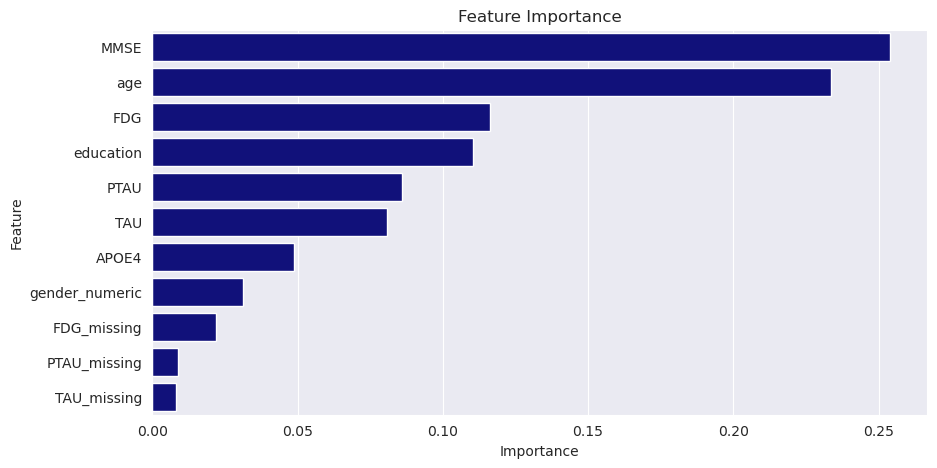

In [29]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from adni_settings import FEATURES

# Assuming df is your DataFrame and it's already loaded
# and 'label' is the target variable
sns.set_style("darkgrid")
df_new = df[FEATURES].copy()
X = df_new.drop('label_numeric', axis=1)
y = df['label_numeric']

# Fit a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)

# Get feature importance
importances = clf.feature_importances_

# Convert importances into a pandas Series for easy plotting
importances_series = pd.Series(importances, index=X.columns)

# Sort the importances_series by values
importances_series_sorted = importances_series.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10,5))
sns.barplot(x=importances_series_sorted.values, y=importances_series_sorted.index, color='darkblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


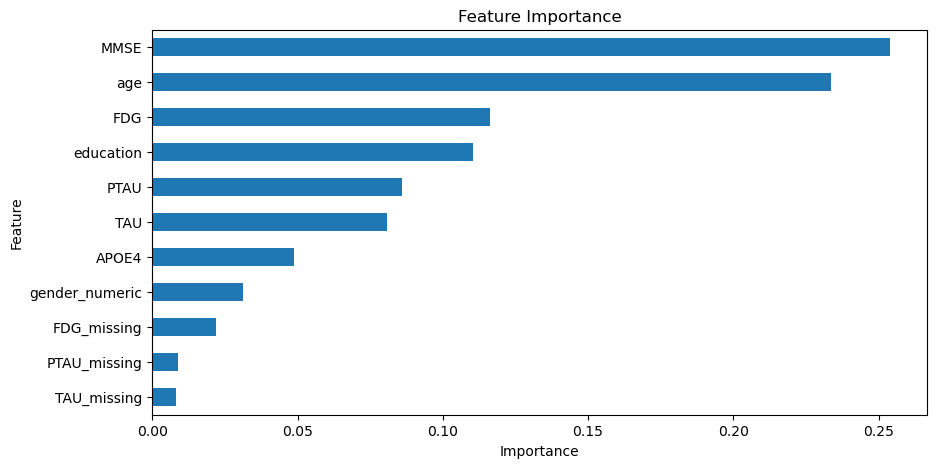

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from adni_settings import FEATURES

# Assuming df is your DataFrame and it's already loaded
# and 'label' is the target variable
df_new = df[FEATURES].copy()
X = df_new.drop('label_numeric', axis=1)
y = df['label_numeric']

# Fit a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)

# Get feature importance
importances = clf.feature_importances_

# Convert importances into a pandas Series for easy plotting
importances_series = pd.Series(importances, index=X.columns)

# Plotting
plt.figure(figsize=(10,5))
importances_series.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [14]:
df.groupby('label').mean()['MMSE']

/tmp/ipykernel_3987403/2834808036.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('label').mean()['MMSE']


label
AD      21.547231
CN      29.087248
LMCI    25.869516
Name: MMSE, dtype: float64

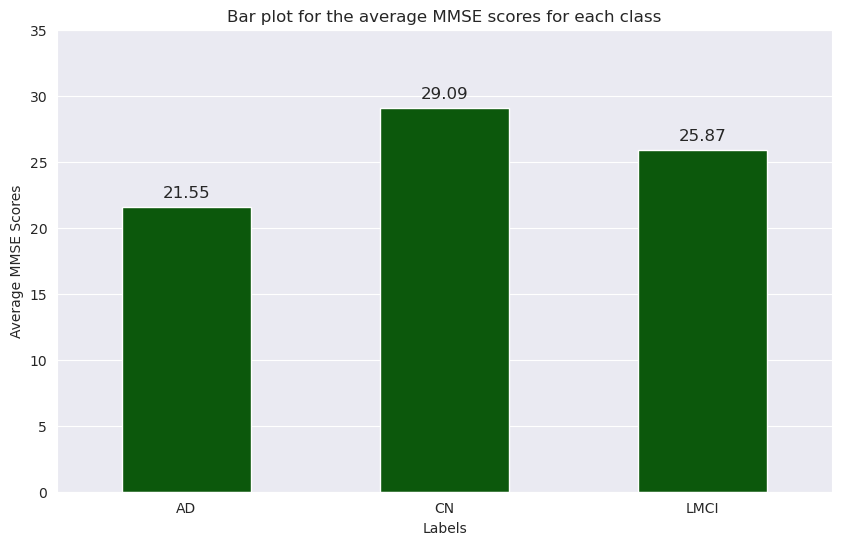

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

values = [21.547231, 29.087248, 25.869516]
labels = ['AD', 'CN', 'LMCI']

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=labels, y=values, color='darkgreen', width=0.5)  # Using a darker orange color and adjusting saturation

# Add numbers on top of each bar
bar_width = 0.6  # Adjust the width of the bars
fontsize = 12  # Adjust the font size for the annotations

for i, v in enumerate(values):
    ax.text(i, v + 0.5, f'{v:.2f}', ha='center', va='bottom', fontsize=fontsize)

# Adjust the position of the bars and x-axis tick labels
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)

plt.xlabel('Labels')
plt.ylabel('Average MMSE Scores')
plt.title('Bar plot for the average MMSE scores for each class')

# Set the y-axis limit to 40
plt.ylim(0, 35)

# # Adjust the width of the bars
# for patch in ax.patches:
#     patch.set_width(bar_width)

plt.show()


In [26]:
df.groupby('label').first()

,r_id,adni_study,p_id,age,gender,education,APOE4,FDG,TAU,PTAU,...,date,VISCODE,image_id_month,image_id,image_original,FDG_missing,TAU_missing,PTAU_missing,gender_numeric,label_numeric
label,,,,,,,,,,,,,,,,,,,,,
AD,10,ADNI1,011_S_0010,73.9,Female,12,1.0,1.07558,308.8,29.315,...,2006-05-09,m06,011_S_0010-2006-05,011_S_0010-2006-05-09,011_S_0010-2006-05-09_12_35_01.0.nii.gz,0,1,1,1,1
CN,5,ADNI1,011_S_0005,73.7,Male,16,0.0,1.36288,337.0,33.430,...,2007-09-07,m24,011_S_0005-2007-09,011_S_0005-2007-09-07,011_S_0005-2007-09-07_12_22_08.0.nii.gz,0,1,1,0,0
LMCI,33,ADNI1,035_S_0033,83.3,Male,20,0.0,1.12316,338.6,35.470,...,2006-12-14,m12,035_S_0033-2006-12,035_S_0033-2006-12-14,035_S_0033-2006-12-14_13_39_01.0.nii.gz,0,0,0,0,2


ValueError: not enough values to unpack (expected 3, got 2)

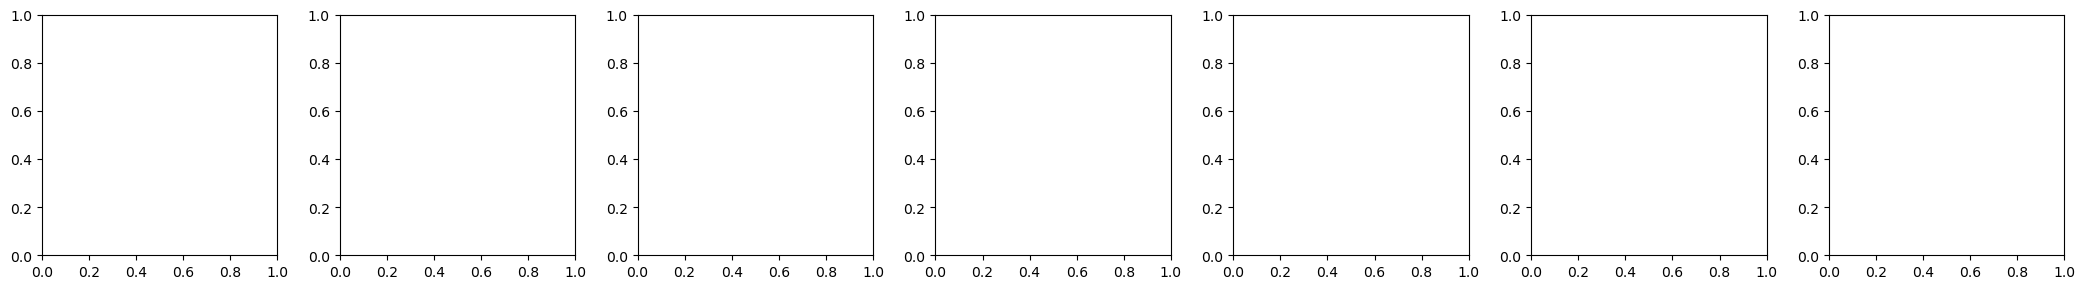

In [28]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import nibabel as nib
def visualize_images():
    # subfolders = sorted([d for d in os.listdir(root_directory) if os.path.isdir(os.path.join(root_directory, d))])[:7]
    # image_filenames = []

    # for subfolder in subfolders:
    #     subfolder_path = os.path.join(root_directory, subfolder)
    #     first_image = sorted([f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))])[0]
    #     image_filenames.append(os.path.join(subfolder_path, first_image))

    fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(21, 3))
    fig.tight_layout()

    filenames=['011_S_0010-2006-05-09_12_35_01.0.nii.gz','011_S_0005-2007-09-07_12_22_08.0.nii.gz','035_S_0033-2006-12-14_13_39_01.0.nii.gz']
    classes = ['AD','CN','LMCI']
    for i, filename, class_name in enumerate(filenames):
        image = nib.load(image_dir+'/'+filename)
        image = image.get_fdata()
        # img = Image.open(image_dir+'/'+filename)
        axes[i].imshow(image)
        axes[i].axis('off')
        # axes[i].set_title(os.path.basename(filename))
        axes[i].set_title(class_name)

    plt.show()

# Example usage:
# root_directory = r'C:\Users\Selen\Desktop\LMU\multimodal_network\data\skin_lesion\HAM10K_grouped_images'
visualize_images()

# # get image name in the given index
# img_folder_name = self.tabular_data['image_original'][idx]
# img_path = os.path.join(
#     self.imge_base_dir, img_folder_name)

# image = nib.load(img_path)
# image = image.get_fdata()

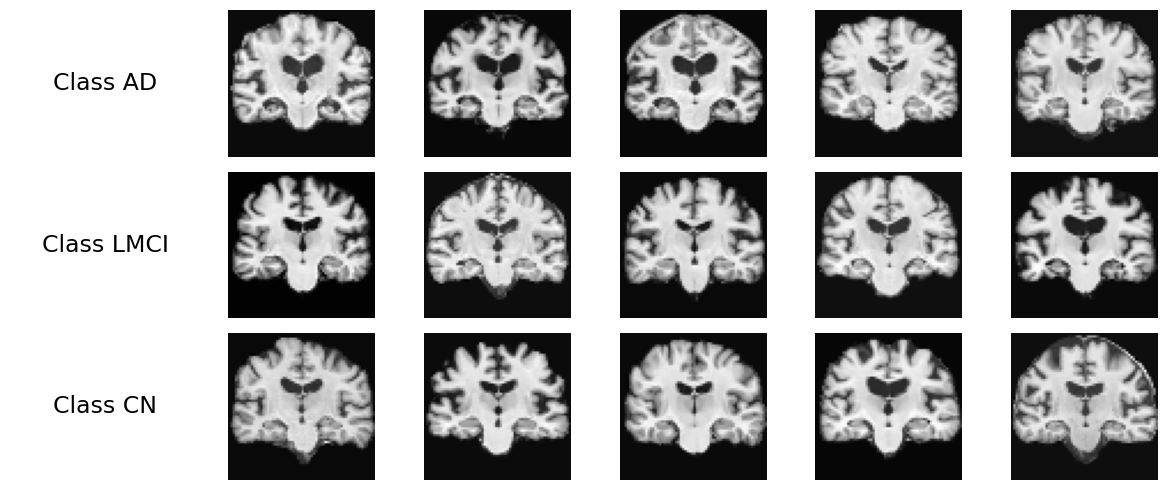

In [19]:
root=r'/vol/aimspace/users/erks/datasets/adni_full/adni_selen/images'
cn = [
root+r'/010_S_0067-2006-08-14_10_51_07.0.nii.gz',
root+r'/003_S_0981-2007-05-02_08_18_48.0.nii.gz',
root+r'/023_S_1190-2007-07-17_09_25_37.0.nii.gz',
root+r'/073_S_0311-2007-02-08_17_39_29.0.nii.gz',
root+r'/126_S_0680-2010-07-21_13_21_58.0.nii.gz',

]

lmci=[
root+r'/067_S_0038-2006-06-23_10_05_57.0.nii.gz',
root+r'/127_S_0112-2010-01-28_14_27_37.0.nii.gz',
root+r'/067_S_0607-2007-03-13_09_27_58.0.nii.gz',
root+r'/032_S_0718-2007-08-20_15_52_04.0.nii.gz',
root+r'/013_S_1120-2007-06-05_12_04_39.0.nii.gz',

]

ad=[
root+r'/018_S_0335-2008-06-24_13_06_49.0.nii.gz',
root+r'/141_S_1137-2006-12-19_16_13_22.0.nii.gz',
root+r'/131_S_0691-2006-07-26_11_16_19.0.nii.gz',
root+r'/136_S_0300-2006-05-09_14_42_37.0.nii.gz',
root+r'/011_S_0010-2006-05-09_12_35_01.0.nii.gz',

]


# Assuming you have three lists, class1_images, class2_images, and class3_images
# Each list contains the image file paths for each class

# Import necessary libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import nibabel as nib

classes={
    1:'AD',
    2:'LMCI',
    3:'CN'
}

# # Define the visualize_images function
# def visualize_images(class1_images, class2_images, class3_images):
#     num_images_per_class = 5
#     num_classes = 3
#     fig, axes = plt.subplots(num_classes, num_images_per_class, figsize=(10, 5))

#     for i, images in enumerate([class1_images, class2_images, class3_images]):
#         class_name = f"Class {classes[i+1]}"
#         for j, image_path in enumerate(images):
#             # image = mpimg.imread(image_path)
#             image = nib.load(image_path)
#             image = image.get_fdata()
#             axes[i, j].imshow(image[:,32,:])
#             axes[i, 0].set_title(class_name)
#             axes[i, j].axis('off')

#     plt.tight_layout()
#     plt.show()

# Define the visualize_images function
import numpy as np
def visualize_images(class1_images, class2_images, class3_images):
    num_images_per_class = 5
    num_classes = 3
    fig, axes = plt.subplots(num_classes, num_images_per_class + 1, figsize=(12, 5))

    for i, images in enumerate([class1_images, class2_images, class3_images]):
        class_name = f"Class {classes[i+1]}"
        axes[i, 0].text(0.5, 0.5, class_name, ha='center', va='center', fontsize=17, transform=axes[i, 0].transAxes)
        axes[i, 0].axis('off')

        for j, image_path in enumerate(images):
            image = nib.load(image_path)
            image = image.get_fdata()
            rotated_image = np.rot90(image[:,32,:], k=1)  # Rotate 90 degrees clockwise

            axes[i, j+1].imshow(rotated_image, cmap='gray')
            # axes[i, j+1].imshow(image[:,32,:])
            axes[i, j+1].axis('off')

    plt.tight_layout()
    plt.show()
# Call the function to visualize the images
visualize_images(ad, lmci, cn)



# Check the dimesnion of every image

In [5]:
import nibabel as nib

img=r'/vol/aimspace/users/erks/datasets/adni_full/adni_selen/images/002_S_0295-2006-04-18_08_20_30.0.nii.gz'
image = nib.load(img)
image = image.get_fdata()

In [9]:

root_folder = image_dir

# Get a list of all .nii.gz files in the root folder and its subdirectories
file_list = glob.glob(os.path.join(root_folder, '**/*.nii.gz'), recursive=False)

shapes = {}
# Iterate through each .nii.gz file
for file_path in file_list:
    # Read the image using nibabel
    img = nib.load(file_path)
    # Get the size of the image
    image_size = img.shape
    if image_size not in list(shapes.keys()):
        shapes[image_size] = 0
    shapes[image_size] += 1

In [10]:
shapes

{(64, 64, 64): 2682}

# Test Supervised Multimodal dataset

In [11]:
# load the data
data = AdniDataModule(batch_size=2,spatial_size=(64,64,64))
data.prepare_data(seed=473)
data.set_supervised_multimodal_dataloader()
train_dataloader = data.train_dataloader()
batch=next(iter(train_dataloader))
img, tab, label = batch

number of workers:  0
number of patients in train:  1193
patient IDs in train:  ['011_S_0005' '011_S_0010' '011_S_0016' '011_S_0023' '018_S_0043'
 '099_S_0051' '011_S_0053' '018_S_0055' '067_S_0056' '023_S_0058'
 '067_S_0059' '023_S_0061' '010_S_0067' '136_S_0086' '123_S_0088'
 '123_S_0091' '022_S_0096' '020_S_0097' '127_S_0112' '027_S_0120'
 '041_S_0125' '023_S_0126' '018_S_0142' '018_S_0155' '035_S_0156'
 '021_S_0159' '014_S_0169' '114_S_0173' '067_S_0176' '011_S_0183'
 '136_S_0184' '136_S_0186' '100_S_0190' '136_S_0194' '023_S_0217'
 '005_S_0223' '021_S_0231' '011_S_0241' '067_S_0257' '127_S_0259'
 '127_S_0260' '041_S_0262' '021_S_0276' '137_S_0283' '130_S_0285'
 '018_S_0286' '007_S_0293' '002_S_0295' '137_S_0301' '031_S_0321'
 '013_S_0325' '023_S_0331' '067_S_0336' '035_S_0341' '007_S_0344'
 '016_S_0354' '016_S_0359' '011_S_0362' '137_S_0366' '018_S_0369'
 '114_S_0374' '023_S_0376' '114_S_0378' '053_S_0389' '127_S_0394'
 '018_S_0425' '136_S_0426' '133_S_0433' '005_S_0448' '037_S_04

# Test triplet dataset

In [2]:
# load the data
data = AdniDataModule(batch_size=2,spatial_size=(64,64,64))
data.prepare_data(seed=473)
data.set_triplet_loss_dataloader()
train_dataloader = data.train_dataloader()
batch=next(iter(train_dataloader))

number of workers:  0
number of patients in train:  1193
patient IDs in train:  ['011_S_0005' '011_S_0010' '011_S_0016' '011_S_0023' '018_S_0043'
 '099_S_0051' '011_S_0053' '018_S_0055' '067_S_0056' '023_S_0058'
 '067_S_0059' '023_S_0061' '010_S_0067' '136_S_0086' '123_S_0088'
 '123_S_0091' '022_S_0096' '020_S_0097' '127_S_0112' '027_S_0120'
 '041_S_0125' '023_S_0126' '018_S_0142' '018_S_0155' '035_S_0156'
 '021_S_0159' '014_S_0169' '114_S_0173' '067_S_0176' '011_S_0183'
 '136_S_0184' '136_S_0186' '100_S_0190' '136_S_0194' '023_S_0217'
 '005_S_0223' '021_S_0231' '011_S_0241' '067_S_0257' '127_S_0259'
 '127_S_0260' '041_S_0262' '021_S_0276' '137_S_0283' '130_S_0285'
 '018_S_0286' '007_S_0293' '002_S_0295' '137_S_0301' '031_S_0321'
 '013_S_0325' '023_S_0331' '067_S_0336' '035_S_0341' '007_S_0344'
 '016_S_0354' '016_S_0359' '011_S_0362' '137_S_0366' '018_S_0369'
 '114_S_0374' '023_S_0376' '114_S_0378' '053_S_0389' '127_S_0394'
 '018_S_0425' '136_S_0426' '133_S_0433' '005_S_0448' '037_S_04

In [7]:
img, pos, neg, tab, tpos,tneg,label = batch[0],batch[1],batch[2],batch[3],batch[4],batch[5],batch[6]

In [4]:
img.shape, tab.shape

(torch.Size([2, 1, 64, 64, 64]), torch.Size([2, 11]))

In [5]:
pos.shape,tpos.shape

(torch.Size([2, 1, 64, 64, 64]), torch.Size([2, 11]))

In [8]:
neg.shape,tneg.shape

(torch.Size([2, 1, 64, 64, 64]), torch.Size([2, 11]))

# Test contrastive loss

In [9]:
# load the data
data = AdniDataModule(batch_size=2,spatial_size=(64,64,64))
data.prepare_data(seed=473)
data.set_contrastive_loss_dataloader()
train_dataloader = data.train_dataloader()
batch=next(iter(train_dataloader))

number of workers:  0
number of patients in train:  1193
patient IDs in train:  ['011_S_0005' '011_S_0010' '011_S_0016' '011_S_0023' '018_S_0043'
 '099_S_0051' '011_S_0053' '018_S_0055' '067_S_0056' '023_S_0058'
 '067_S_0059' '023_S_0061' '010_S_0067' '136_S_0086' '123_S_0088'
 '123_S_0091' '022_S_0096' '020_S_0097' '127_S_0112' '027_S_0120'
 '041_S_0125' '023_S_0126' '018_S_0142' '018_S_0155' '035_S_0156'
 '021_S_0159' '014_S_0169' '114_S_0173' '067_S_0176' '011_S_0183'
 '136_S_0184' '136_S_0186' '100_S_0190' '136_S_0194' '023_S_0217'
 '005_S_0223' '021_S_0231' '011_S_0241' '067_S_0257' '127_S_0259'
 '127_S_0260' '041_S_0262' '021_S_0276' '137_S_0283' '130_S_0285'
 '018_S_0286' '007_S_0293' '002_S_0295' '137_S_0301' '031_S_0321'
 '013_S_0325' '023_S_0331' '067_S_0336' '035_S_0341' '007_S_0344'
 '016_S_0354' '016_S_0359' '011_S_0362' '137_S_0366' '018_S_0369'
 '114_S_0374' '023_S_0376' '114_S_0378' '053_S_0389' '127_S_0394'
 '018_S_0425' '136_S_0426' '133_S_0433' '005_S_0448' '037_S_04

In [12]:
image, tab, label=batch

In [13]:
image.shape

torch.Size([2, 2, 1, 64, 64, 64])

# Split the test and train data

In [4]:
adni = pd.read_csv(CSV_DIR)

In [5]:

from sklearn.model_selection import StratifiedShuffleSplit
import torch

class Sampler(object):
    """Base class for all Samplers.
    """

    def __init__(self, data_source):
        pass

    def __iter__(self):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError
    
class StratifiedSampler(Sampler):
    """Stratified Sampling
    Provides equal representation of target classes
    """

    def __init__(self, class_vector, test_size, seed, n_splits=1):
        """
        Arguments
        ---------
        class_vector : torch tensor
            a vector of class labels
        batch_size : integer
            batch_size
        """
        self.n_splits = n_splits
        self.class_vector = class_vector
        self.test_size = test_size
        self.seed = seed

    def gen_sample_array(self):

        s = StratifiedShuffleSplit(
            n_splits=self.n_splits, test_size=self.test_size, random_state=self.seed)
        X = torch.randn(self.class_vector.size(0), 2).numpy()
        y = self.class_vector.numpy()
        s.get_n_splits(X, y)

        train_index, test_index = next(s.split(X, y))
        return train_index, test_index

    def __iter__(self):
        return iter(self.gen_sample_array())

    def __len__(self):
        return len(self.class_vector)


In [7]:
train_patient_label_list = adni.groupby(
            'p_id')['label_numeric'].first()
train_patient_label_df = pd.DataFrame(train_patient_label_list)
train_patient_label_df = train_patient_label_df.reset_index()
train_patient_label_df

,p_id,label_numeric
0,002_S_0295,0
1,002_S_0413,0
2,002_S_0559,0
3,002_S_0619,1
4,002_S_0685,0
...,...,...
673,941_S_1202,0
674,941_S_1203,0
675,941_S_1295,2
676,941_S_1311,2


In [11]:
train_patient_label_df['label_numeric'].mean(),train_patient_label_df['label_numeric'].max()

(1.1843657817109146, 2)

In [31]:

ss = StratifiedSampler(torch.FloatTensor(
    train_patient_label_df.label_numeric), test_size=0.15, seed=473)
train_indices, test_indices = ss.gen_sample_array()
indices = {'train': train_indices,
                   'test': test_indices
                   }
len(train_indices), len(test_indices)

(576, 102)

In [32]:

train_patients = train_patient_label_df.iloc[indices['train']]
test_patients = train_patient_label_df.iloc[indices['test']]

len(set(train_patients['p_id']) - set(test_patients['p_id'])), len(train_patients)

(576, 576)

In [33]:
train_df = adni[adni['p_id'].isin(
    train_patients.p_id)].reset_index(drop=True)
# prepare val dataframe
test_df = adni[adni['p_id'].isin(
    test_patients.p_id)].reset_index(drop=True)

len(train_df),len(test_df)

(1512, 280)

In [34]:
train_df

,r_id,adni_study,p_id,age,gender,education,APOE4,FDG,TAU,PTAU,...,date,VISCODE,image_id_month,image_id,image_original,FDG_missing,TAU_missing,PTAU_missing,gender_numeric,label_numeric
0,5,ADNI1,011_S_0005,73.7,Male,16,0.0,1.362880,337.0,33.430,...,2007-09-07,m24,011_S_0005-2007-09,011_S_0005-2007-09-07,011_S_0005-2007-09-07_12_22_08.0.nii.gz,0,1,1,0,0
1,5,ADNI1,011_S_0005,73.7,Male,16,0.0,1.338660,337.0,33.430,...,2008-09-10,m36,011_S_0005-2008-09,011_S_0005-2008-09-10,011_S_0005-2008-09-10_12_08_32.0.nii.gz,0,1,1,0,0
2,10,ADNI1,011_S_0010,73.9,Female,12,1.0,1.075580,308.8,29.315,...,2006-05-09,m06,011_S_0010-2006-05,011_S_0010-2006-05-09,011_S_0010-2006-05-09_12_35_01.0.nii.gz,0,1,1,1,1
3,10,ADNI1,011_S_0010,73.9,Female,12,1.0,1.007210,287.7,27.370,...,2006-11-09,m12,011_S_0010-2006-11,011_S_0010-2006-11-09,011_S_0010-2006-11-09_12_01_54.0.nii.gz,0,0,0,1,1
4,10,ADNI1,011_S_0010,73.9,Female,12,1.0,0.959766,308.8,29.315,...,2007-11-07,m24,011_S_0010-2007-11,011_S_0010-2007-11-07,011_S_0010-2007-11-07_12_23_57.0.nii.gz,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1206,ADNI1,007_S_1206,72.9,Male,14,0.0,1.173217,246.7,20.770,...,2007-01-30,bl,007_S_1206-2007-01,007_S_1206-2007-01-30,007_S_1206-2007-01-17_09_31_23.0.nii.gz,1,0,0,0,0
1508,1206,ADNI1,007_S_1206,72.9,Male,14,0.0,1.173217,285.1,23.690,...,2009-02-05,m24,007_S_1206-2009-02,007_S_1206-2009-02-05,007_S_1206-2009-02-12_11_33_49.0.nii.gz,1,0,0,0,0
1509,1206,ADNI1,007_S_1206,72.9,Male,14,0.0,1.173217,265.9,22.230,...,2010-02-04,m36,007_S_1206-2010-02,007_S_1206-2010-02-04,007_S_1206-2010-02-10_12_20_13.0.nii.gz,1,1,1,0,0
1510,1227,ADNI1,136_S_1227,64.6,Female,12,0.0,1.173217,221.9,18.660,...,2007-02-19,bl,136_S_1227-2007-02,136_S_1227-2007-02-19,136_S_1227-2007-02-06_15_41_39.0.nii.gz,1,0,0,1,2


In [35]:
test_df.groupby('label_numeric').count()

,r_id,adni_study,p_id,age,gender,education,APOE4,FDG,TAU,PTAU,...,update_stamp,date,VISCODE,image_id_month,image_id,image_original,FDG_missing,TAU_missing,PTAU_missing,gender_numeric
label_numeric,,,,,,,,,,,,,,,,,,,,,
0,91,91,91,91,91,91,91,91,91,91,...,91,91,91,91,91,91,91,91,91,91
1,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
2,135,135,135,135,135,135,135,135,135,135,...,135,135,135,135,135,135,135,135,135,135


In [36]:
train_df.groupby('label_numeric').count()

,r_id,adni_study,p_id,age,gender,education,APOE4,FDG,TAU,PTAU,...,update_stamp,date,VISCODE,image_id_month,image_id,image_original,FDG_missing,TAU_missing,PTAU_missing,gender_numeric
label_numeric,,,,,,,,,,,,,,,,,,,,,
0,505,505,505,505,505,505,505,505,505,505,...,505,505,505,505,505,505,505,505,505,505
1,253,253,253,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,253,253,253
2,754,754,754,754,754,754,754,754,754,754,...,754,754,754,754,754,754,754,754,754,754


In [37]:
train_df.to_csv(r'/vol/aimspace/users/erks/datasets/adni_full/adni_selen/train_data.csv',index=False)

In [38]:
test_df.to_csv(r'/vol/aimspace/users/erks/datasets/adni_full/adni_selen/test_data.csv',index=False)